# Feature engineering

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## 1. 데이터 읽기
### kaggle('../data/creditcard.csv'')로 search
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
df = pd.read_csv("../data/creditcard.csv")
df.head()
df.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

In [4]:
df = df.sample(frac=0.1)

In [5]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
Time,float64,28481,0,25715
V1,float64,28481,0,28237
V2,float64,28481,0,28237
V3,float64,28481,0,28237
V4,float64,28481,0,28237
V5,float64,28481,0,28237
V6,float64,28481,0,28237
V7,float64,28481,0,28237
V8,float64,28481,0,28237
V9,float64,28481,0,28237


## 특성추출 및 선택

## Feature selection
### 가. Removing features with low variance

In [6]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
pd.DataFrame(X)
selector = VarianceThreshold()
selector.fit_transform(X)

,0,1,2,3
0,0,2,0,3
1,0,1,4,3
2,0,1,1,3


array([[2, 0],
       [1, 4],
       [1, 1]])

이항분포(베르누이)를 갖는 변수에서 '1', '0'이 전체의 80% 이상인 변수를 제거할 때, 이항분포의분산은 p*(1-p)
첫번쨰와 마지막 컬럼은 p = 5/6 > 0.8 만큼 '1' 혹은 '0'을 포함하고 있어 제거함 

In [7]:
X = [[0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 1, 0]]
X
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) # 
sel.fit_transform(X)

[[0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0]]

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## 자료

In [8]:
X = df.drop(['Class'], axis=1)
y = df['Class']
feature_name = X.columns
best_features = 15
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
11925,20558.0,1.151331,0.085321,0.930061,1.432405,-0.625299,-0.162422,-0.571394,0.126638,1.914226,...,-0.348752,-0.024427,0.132488,-0.006082,-0.040151,0.333934,-0.292094,0.016171,0.017773,10.00
221229,142483.0,1.485571,-0.664483,-2.120412,1.478630,0.520758,-0.535023,1.014361,-0.427269,0.066394,...,0.367623,0.219599,0.192350,-0.246439,0.639693,0.408821,-0.548922,-0.070670,-0.004165,300.00
172385,121078.0,1.807695,0.267726,-1.156979,3.298488,1.486452,2.284616,-0.252136,0.562261,-1.024976,...,-0.339183,0.366763,1.180624,0.017288,-0.941325,0.070205,0.326118,0.003542,-0.073047,10.59
172516,121127.0,-0.601816,0.549951,-0.030954,0.891547,1.536557,-0.554017,1.250124,-0.338585,-0.518762,...,0.095783,0.097125,0.654195,-0.334835,-0.389867,-0.008793,-0.407772,0.151242,0.048397,45.00
408,294.0,-0.745116,0.446440,1.714154,-0.146626,-0.244287,-0.963058,0.566537,-0.044998,0.274475,...,-0.220636,-0.149227,-0.440704,0.088860,0.708177,-0.570540,0.036992,-0.041732,0.182178,33.33


In [9]:
sel = VarianceThreshold(threshold = 0.7)
sel.fit(X)
var_support = sel.get_support()
var_support
np.sum(var_support*1)

VarianceThreshold(threshold=0.7)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True])

20

In [10]:
var_features = X.loc[:, var_support].columns
var_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Amount'],
      dtype='object')

In [11]:
pd.DataFrame(sel.fit_transform(X), columns = var_features).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Amount
0,20558.0,1.151331,0.085321,0.930061,1.432405,-0.625299,-0.162422,-0.571394,0.126638,1.914226,-0.311280,0.312256,-3.543241,-0.684957,2.064848,0.991480,0.237557,0.539302,0.317868,10.00
1,142483.0,1.485571,-0.664483,-2.120412,1.478630,0.520758,-0.535023,1.014361,-0.427269,0.066394,0.096184,-0.991595,0.593405,0.474567,0.449422,-0.498694,-0.665920,-0.225906,-0.601354,300.00
2,121078.0,1.807695,0.267726,-1.156979,3.298488,1.486452,2.284616,-0.252136,0.562261,-1.024976,1.512705,0.316526,0.207568,-0.334152,0.460596,-0.652201,0.276486,-0.429932,-0.748095,10.59
3,121127.0,-0.601816,0.549951,-0.030954,0.891547,1.536557,-0.554017,1.250124,-0.338585,-0.518762,0.554469,0.300026,0.024801,-1.032237,0.579792,-0.837665,-0.967359,-0.244931,0.295369,45.00
4,294.0,-0.745116,0.446440,1.714154,-0.146626,-0.244287,-0.963058,0.566537,-0.044998,0.274475,-0.686536,-0.788683,-0.213757,-1.215176,-0.056879,-0.700208,-0.096157,-0.079910,-0.625466,33.33


### 독립변수(연속형) : 입력변수(연속형) ---> 상관관계
### 독립변수(연속형) : 입력변수(범주형) ---> LDA, Logistic
### 독립변수(범주형) : 입력변수(연속형) ---> ANOVA
### 독립변수(범주형) : 입력변수(범주형) ---> Chi-Squared

- https://scikit-learn.org/stable/modules/feature_selection.html

- ANOVA https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html

### 나. 상관계수 (Pearson correlation)

In [12]:
def corr_selector(X, y):

    cor_list = []
    for i in X.columns:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_feat = X.iloc[:, np.argsort(np.abs(cor_list))[best_features*-1:]].columns.tolist()
    cor_support = [True if i in cor_feat else False for i in feature_name]

    return cor_feat, cor_support

In [13]:
corr_feature, corr_support = corr_selector(X, y)
'/'.join(corr_feature)
''.join(str(corr_support))

'V6/V2/V5/V9/V18/V1/V4/V11/V16/V7/V3/V10/V12/V14/V17'

'[False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False]'

### 다. 카이제곱

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [15]:
best_features

15

In [16]:
def Chi_selector(X, y):
    chi_selector = SelectKBest(chi2, k=best_features)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    
    return chi_feature, chi_support

chi_feature, chi_support = Chi_selector(X, y)
','.join(chi_feature)
''.join(str(chi_support))

'V1,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19'

'[False  True False  True  True  True  True  True False  True  True  True\n  True False  True False  True  True  True  True False False False False\n False False False False False False]'

### 라. RFE(recursive feature elimination)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [18]:
def Wrapper_RFE(X, y):
    rfe_selector = RFE(estimator=LogisticRegression(),
                        n_features_to_select=best_features, step=20)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    
    return rfe_support, rfe_feature

rfe_support, rfe_feature = Wrapper_RFE(X, y)
','.join(rfe_feature)
''.join(str(rfe_support))

'Time,V1,V3,V4,V6,V9,V10,V11,V12,V13,V14,V16,V17,V21,V25'

'[ True  True False  True  True False  True False False  True  True  True\n  True  True  True False  True  True False False False  True False False\n False  True False False False False]'

### 마. SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
def logistic_regression(X, y):
    embeded_lr2_selector = SelectFromModel(LogisticRegression(), # default l2
                                           threshold='median') 
    X_norm = MinMaxScaler().fit_transform(X)
    embeded_lr2_selector.fit(X_norm, y)
    embeded_lr2_support = embeded_lr2_selector.get_support()
    embeded_lr2_feature = X.loc[:,embeded_lr2_support].columns.tolist()
    
    return embeded_lr2_support, embeded_lr2_feature

embeded_lr2_support, embeded_lr2_feature = logistic_regression(X, y)
','.join(embeded_lr2_feature)
len(embeded_lr2_feature)

'Time,V1,V3,V4,V6,V9,V10,V11,V12,V13,V14,V16,V17,V21,V25'

15

In [21]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X, y):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(), 
                                          threshold='median')
    embeded_rf_selector.fit(X, y)    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    return embeded_rf_support, embeded_rf_feature

embeded_rf_support, embeded_rf_feature = random_forest(X, y)
'/'.join(embeded_rf_feature)

'Time/V4/V6/V7/V9/V10/V11/V12/V14/V16/V17/V18/V19/V26/V27'

RandomForestClassifier()

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

([<matplotlib.axis.XTick at 0x17e01273c70>,
 [Text(0, 0, 'Time'),
  Text(1, 0, 'V1'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V3'),
  Text(4, 0, 'V4'),
  Text(5, 0, 'V5'),
  Text(6, 0, 'V6'),
  Text(7, 0, 'V7'),
  Text(8, 0, 'V8'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V10'),
  Text(11, 0, 'V11'),
  Text(12, 0, 'V12'),
  Text(13, 0, 'V13'),
  Text(14, 0, 'V14'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V16'),
  Text(17, 0, 'V17'),
  Text(18, 0, 'V18'),
  Text(19, 0, 'V19'),
  Text(20, 0, 'V20'),
  Text(21, 0, 'V21'),
  Text(22, 0, 'V22'),
  Text(23, 0, 'V23'),
  Text(24, 0, 'V24'),
  Text(25, 0, 'V25'),
  Text(26, 0, 'V26'),
  Text(27, 0, 'V27'),
  Text(28, 0, 'V28'),
  Text(29, 0, 'Amount')])

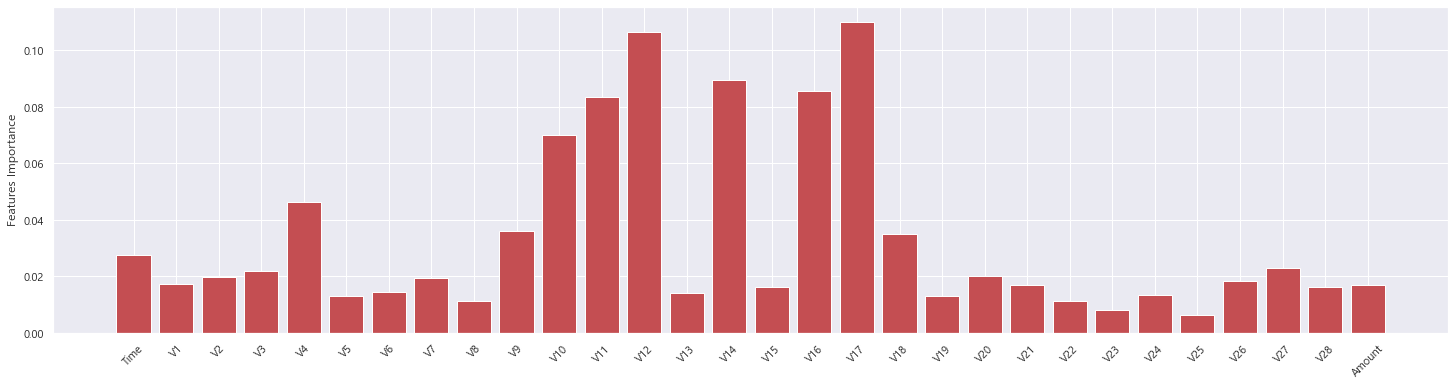

In [22]:
forest = RandomForestClassifier()
forest.fit(X, y)
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
ax = plt.bar(range(X.shape[1]), forest.feature_importances_, color='r')

### 종합 평점

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

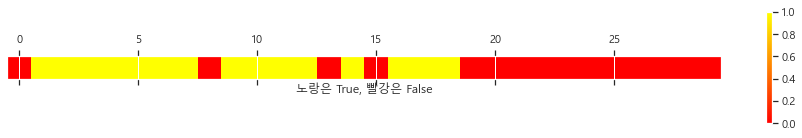

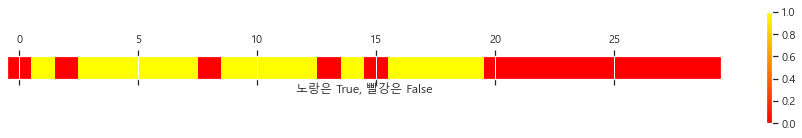

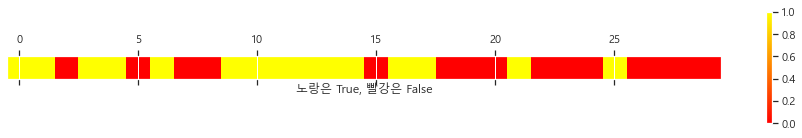

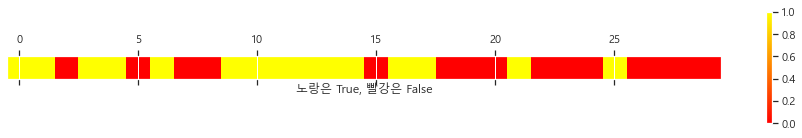

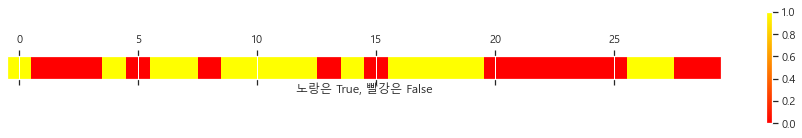

In [23]:
supports= [corr_support, chi_support, rfe_support, 
           embeded_lr2_support, embeded_rf_support]
for sp in supports :
    plt.matshow(np.array(sp).reshape(1, -1), cmap='autumn')
    plt.xlabel('노랑은 True, 빨강은 False')
    plt.yticks(());plt.colorbar()

In [24]:
feature_list = pd.DataFrame({'변수명':feature_name, 'Pearson':corr_support, 
                             'Chi-2':chi_support, 'RFE':rfe_support, 
                             'Logit_L2':embeded_lr2_support, 
                             'RF':embeded_rf_support
                            })
feature_list['총점'] = np.sum(feature_list, axis=1)
feature_list = feature_list.sort_values(['총점'] , ascending=False)
feature_list

,변수명,Pearson,Chi-2,RFE,Logit_L2,RF,총점
12,V12,True,True,True,True,True,5
14,V14,True,True,True,True,True,5
4,V4,True,True,True,True,True,5
17,V17,True,True,True,True,True,5
6,V6,True,True,True,True,True,5
16,V16,True,True,True,True,True,5
9,V9,True,True,True,True,True,5
10,V10,True,True,True,True,True,5
11,V11,True,True,True,True,True,5
3,V3,True,True,True,True,False,4


In [26]:
'''
feature_list.to_excel('../output/feature.xlsx')
data01 = pd.read_excel('../output/feature.xlsx', index_col=0)
data01.head(2)

feature_list.to_pickle('../output/feature.pkl')
data02 = pd.read_pickle('../output/feature.pkl')
data02.head(2)
'''

"\nfeature_list.to_excel('../output/feature.xlsx')\ndata01 = pd.read_excel('../output/feature.xlsx', index_col=0)\ndata01.head(2)\n\nfeature_list.to_pickle('../output/feature.pkl')\ndata02 = pd.read_pickle('../output/feature.pkl')\ndata02.head(2)\n"

<AxesSubplot:xlabel='변수명'>

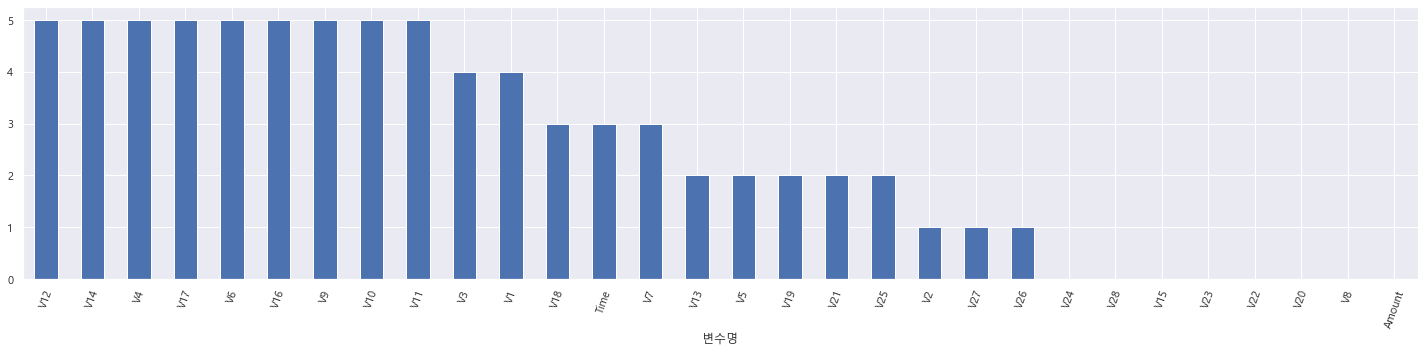

In [27]:
feature = feature_list.set_index('변수명')
pd.DataFrame(feature).총점.plot(kind='bar', rot = '70', figsize = (25, 5))

In [28]:
feature.shape
feature_select = feature[feature['총점'] >= 3]
feature_select.shape
feature_select.index

(30, 6)

(14, 6)

Index(['V12', 'V14', 'V4', 'V17', 'V6', 'V16', 'V9', 'V10', 'V11', 'V3', 'V1',
       'V18', 'Time', 'V7'],
      dtype='object', name='변수명')

In [29]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'V12'),
  Text(1.5, 0, 'V14'),
  Text(2.5, 0, 'V4'),
  Text(3.5, 0, 'V17'),
  Text(4.5, 0, 'V6'),
  Text(5.5, 0, 'V16'),
  Text(6.5, 0, 'V9'),
  Text(7.5, 0, 'V10'),
  Text(8.5, 0, 'V11'),
  Text(9.5, 0, 'V3'),
  Text(10.5, 0, 'V1'),
  Text(11.5, 0, 'V18'),
  Text(12.5, 0, 'Time'),
  Text(13.5, 0, 'V7')])

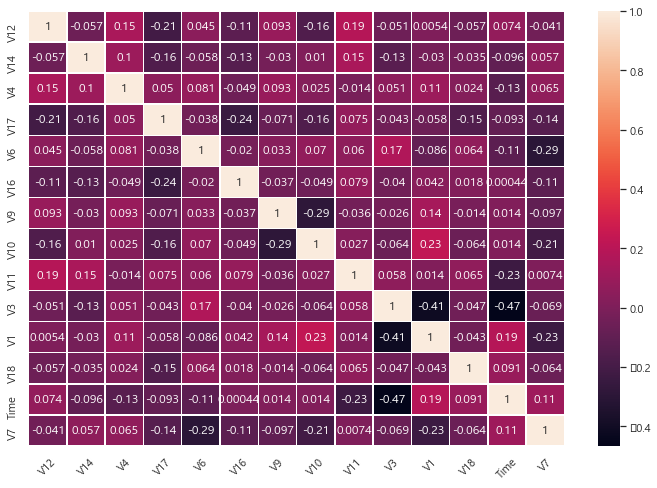

In [34]:
X = X[feature_select.index]
corr_matrix = X.corr(method = "spearman")
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = corr_matrix, annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=45)

# VIF(variance_inflation_factor)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif.head()

,VIF Factor,features
0,1.001447,V9
1,1.002771,V4
2,1.003358,V18
3,1.003572,V16
4,1.003943,V10


In [32]:
vif

,VIF Factor,features
0,1.001447,V9
1,1.002771,V4
2,1.003358,V18
3,1.003572,V16
4,1.003943,V10
5,1.004952,V1
6,1.005299,V12
7,1.005710,V14
8,1.006220,V17
9,1.010790,V6


# END